# Instartcart Market Analysis
*By Don Kim*

`instacart`


# Data Analysis Cycle
---

> <a href="#Reading-datasets">1. Reading datasets</a><ul></ul>
> <a href="#Initial-data-cleaning">2. Initial data cleaning</a><ul></ul>
> <a href="#Data-exploration">3. Data exploration</a><ul></ul>
> <a href="#Correlation">4. Correlation</a><ul></ul>
> <a href="#Association-rule">5. Association rule</a><ul></ul>
> <a href="#Customer-segmentation">6. Customer segmentation</a><ul></ul>
> <a href="#Decision-tree">7. Decision Tree</a><ul></ul>

# Datasets links
<a href="https://storage.googleapis.com/instacart-datasets/aisles.csv">aisles.csv</a><ul></ul>
<a href="https://storage.googleapis.com/instacart-datasets/departments.csv">departments.csv</a><ul></ul>
<a href="https://storage.googleapis.com/instacart-datasets/order_products__prior.csv">order_products__prior.csv</a><ul></ul>
<a href="https://storage.googleapis.com/instacart-datasets/order_products__train.csv">order_products__train.csv</a><ul></ul>
<a href="https://storage.googleapis.com/instacart-datasets/orders.csv">orders.csv</a><ul></ul>
<a href="https://storage.googleapis.com/instacart-datasets/products.csv">products.csv</a><ul></ul>

[entire dataset from Instacart site](https://www.kaggle.com/c/instacart-market-basket-analysis/overview)


---
---

# Reading datasets
<a href="#Instartcart-Market-Analysis">Back to top</a><ul></ul>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


datasets are loaded locally.

In [2]:
aisles = pd.read_csv('/Users/donkim/Desktop/instacart-market-basket-analysis/aisles.csv')
departments = pd.read_csv('/Users/donkim/Desktop/instacart-market-basket-analysis/departments.csv')
order_products_prior = pd.read_csv('/Users/donkim/Desktop/instacart-market-basket-analysis/order_products__prior.csv')
order_products_train = pd.read_csv('/Users/donkim/Desktop/instacart-market-basket-analysis/order_products__train.csv')
orders = pd.read_csv('/Users/donkim/Desktop/instacart-market-basket-analysis/orders.csv')
products = pd.read_csv('/Users/donkim/Desktop/instacart-market-basket-analysis/products.csv')
df_list = []
df_list.append(aisles)
df_list.append(departments)
df_list.append(order_products_prior)
df_list.append(order_products_train)
df_list.append(orders)
df_list.append(products)

---
---

# Initial data cleaning
<a href="#Instartcart-Market-Analysis">Back to top</a><ul></ul>

It shows all the datatypes and number of null values in datasets. Null values are removed instead of replacing.

In [ ]:
for l in df_list:
  print(l.info())
  print(l.shape)
  print(' - NaN in dataset - ')
  print(l.isnull().sum())
  print('--------------------------------------------')

# orders.days_since_prior_order.dropna(axis=0, how='any',inplace=True)
# orders['days_since_prior_order'] = orders.days_since_prior_order.astype(int)
orders.days_since_prior_order.dropna(inplace=True)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None
(134, 2)
 - NaN in dataset - 
aisle_id    0
aisle       0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None
(21, 2)
 - NaN in dataset - 
department_id    0
department       0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int6

---
---

# Data exploration
<a href="#Instartcart-Market-Analysis">Back to top</a><ul></ul>

## Plot of order demand during week over 24 hours

It shows a plot of order count in 24 hours. Each line represents monday to sunday

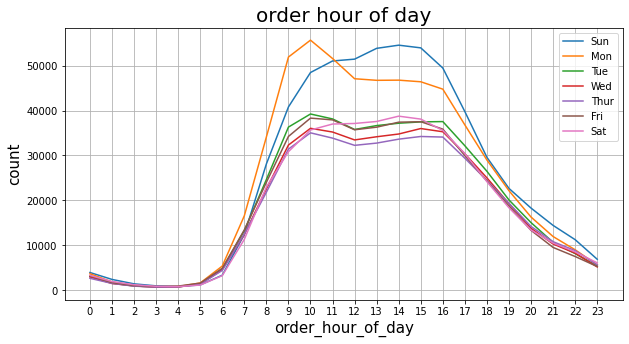

In [ ]:
#
path='/content/drive/My Drive/'
plt.figure(figsize=(10,5))
for i in range(0,7):
  orders[orders['order_dow']==i].groupby('order_hour_of_day').size().plot()
plt.legend(['Sun','Mon','Tue','Wed','Thur','Fri','Sat'])
plt.title('order hour of day', fontsize= 20)
plt.xlabel('order_hour_of_day', fontsize= 15) 
plt.ylabel('count', fontsize= 15)
plt.xticks(range(0,24))
plt.grid()
#plt.savefig(path+'.png')
plt.show()

## Number of order in a week

(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.,
        700000.]), <a list of 8 Text major ticklabel objects>)

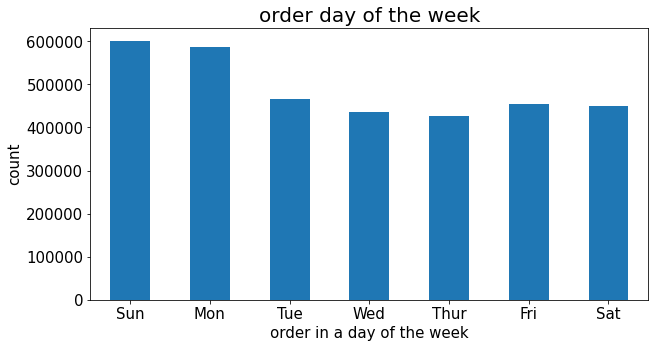

In [ ]:
plt.figure(figsize=(10,5))
orders.groupby('order_dow').size().plot(kind="bar")
plt.title('order day of the week',fontsize=20)
plt.xlabel('order in a day of the week',fontsize=15) 
plt.ylabel('count',fontsize=15)
plt.xticks([0,1,2,3,4,5,6],['Sun','Mon','Tue','Wed','Thur','Fri','Sat'],rotation=0,fontsize=15)
plt.yticks(fontsize=15)
#plt.savefig(path+'.png')

## Days since order has placed

Plot shows how long the delay is when customer do next order. Pick order day is after 7 days. Anything over 30 days is in 30 days bar.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

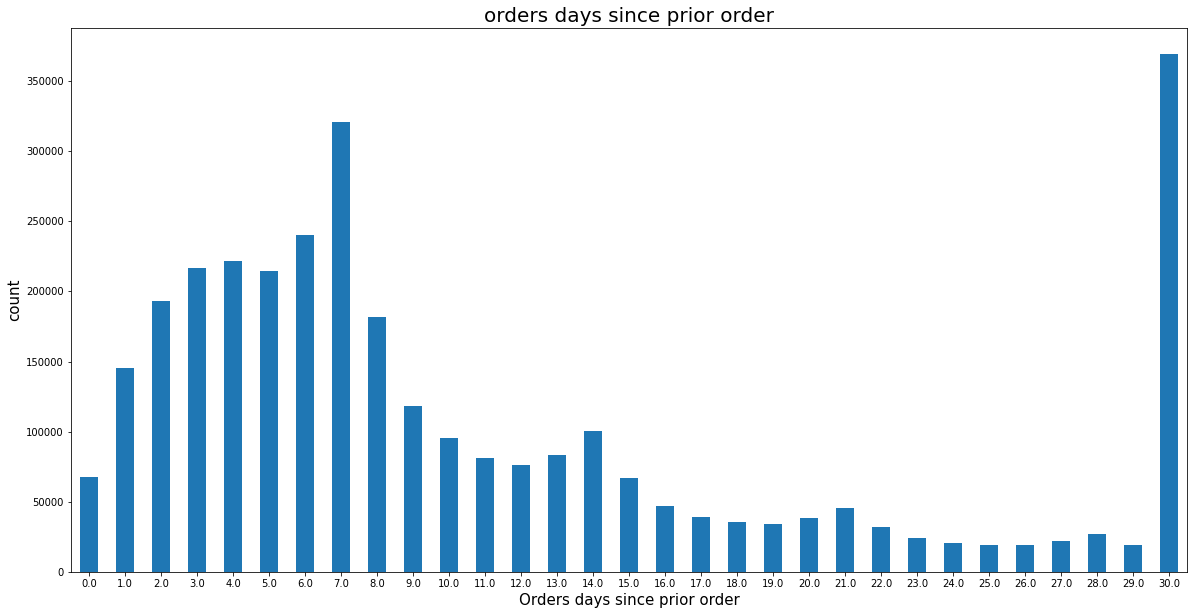

In [ ]:
plt.figure(figsize=(20,10))
orders.groupby('days_since_prior_order').size().plot(kind="bar")
plt.title('orders days since prior order', fontsize=20)
plt.xlabel('Orders days since prior order', fontsize=15)
plt.ylabel('count',fontsize =15)
plt.xticks(rotation=0)



## Finding top 10 selling products

### - Merge dataset 
Merge dataset in order to find product name.

In [ ]:
new_train = pd.merge(order_products_train, products, on='product_id')
new_train.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1,49302,1,1,Bulgarian Yogurt,120,16
1,816049,49302,7,1,Bulgarian Yogurt,120,16
2,1242203,49302,1,1,Bulgarian Yogurt,120,16
3,1383349,49302,11,1,Bulgarian Yogurt,120,16
4,1787378,49302,8,0,Bulgarian Yogurt,120,16


### - Plot of 10 selling products

TypeError: ignored

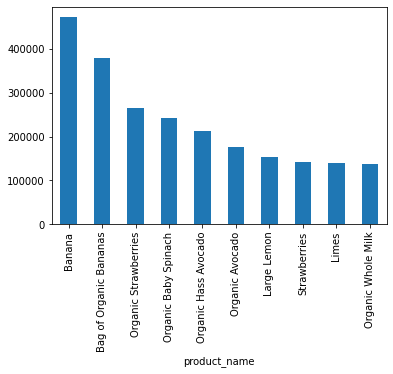

In [ ]:
#df = pd.DataFrame({'Product_ID':order_products_train.product_id.unique()})
#df.groupby('Product_ID').count()
#df
#order_products_train.product_id.value_counts()
#c = products[products.product_id.isin(df.index)].product_name
# merge https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
new_train = pd.merge(order_products_prior, products, on='product_id')
df = new_train.groupby('product_name').size().to_frame('size')
df2 = df.sort_values(by='size', ascending=False).head(10)
p = df2.plot.bar()
p.legend().remove()
p.title('Top 10 selling products')

## Plot of reorder ratio
58% products are reordered

1    0.589697
0    0.410303
Name: reordered, dtype: float64


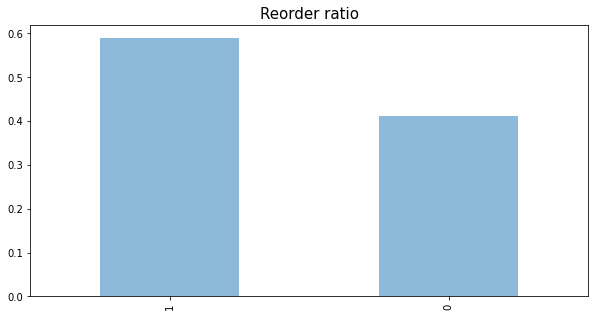

In [ ]:
plt.figure(figsize=(10,5))
order_products_train.head()
#df.plot.bar( y='size', rot =0)
order_products_prior.reordered.value_counts(normalize=True).plot(kind="bar",alpha =0.5)
plt.title('Reorder ratio',fontsize=15)
print(order_products_prior.reordered.value_counts(normalize=True))

## Distribution of number of order items

Maximum number of order items is 145. Median size of order is 8.


          size
order_id      
2            9
3            8
4           13
5           26
6            3
               size
count  3.214874e+06
mean   1.008888e+01
std    7.525398e+00
min    1.000000e+00
25%    5.000000e+00
50%    8.000000e+00
75%    1.400000e+01
max    1.450000e+02
median  size    8.0
dtype: float64
max size    145
dtype: int64


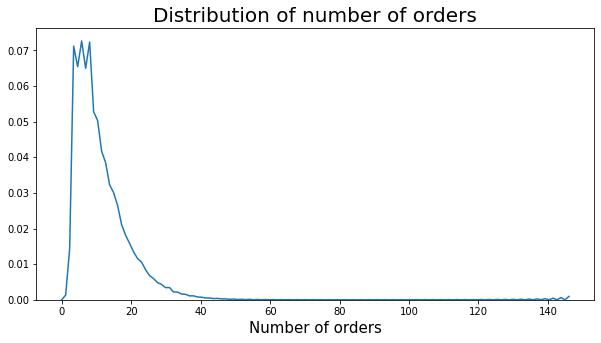

In [ ]:

df = order_products_prior.groupby('order_id').size().to_frame('size')
#df2 = df.sort_values(by='size', ascending=False).head(30)
#df2.plot.bar()
#print(df2)
#order_products_train.order_id.value_counts().plot(kind="bar",alpha =0.5)
#order_products_train.order_id.value_counts(
plt.figure(figsize=(10,5))
print(df.head())
sns.distplot(df,hist=False)
plt.title('Distribution of number of orders', fontsize =20)
plt.xlabel('Number of orders', fontsize =15)
print(df.describe())
print('median ',df.median())
print('max', df.max())


## Number of orders for customers

Customers orders at least 3 times.

Text(0.5, 0, 'Order numbers')

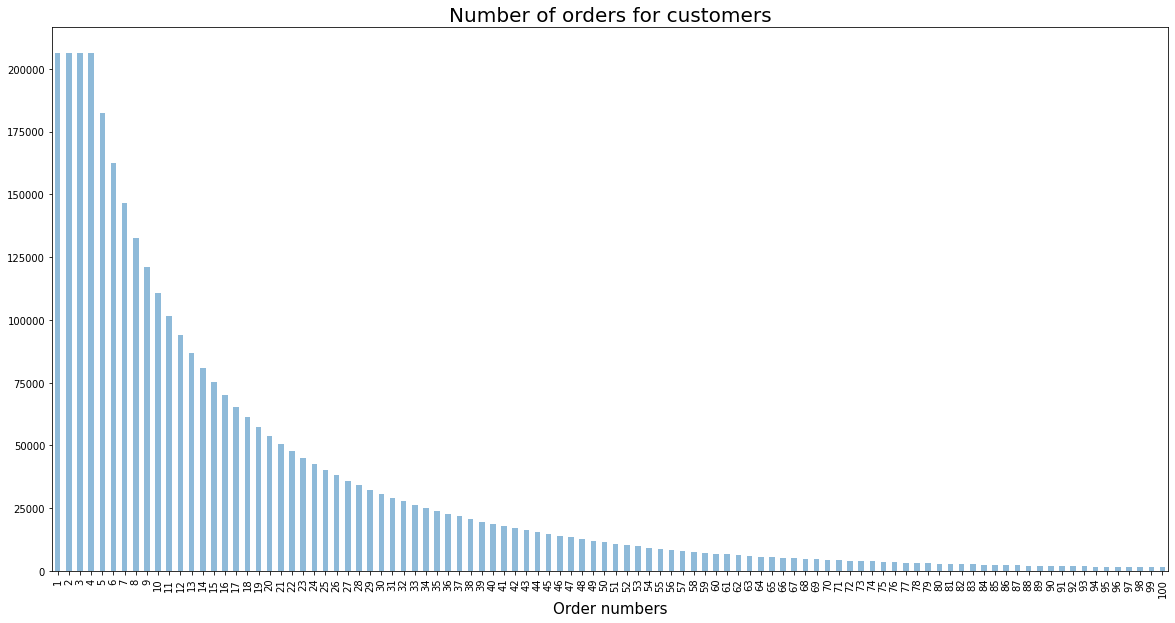

In [ ]:
plt.figure(figsize=(20,10))
orders.order_number.value_counts(normalize=False).plot(kind="bar",alpha =0.5)

plt.title('Number of orders for customers',fontsize=20)
plt.xlabel('Order numbers',fontsize=15)
# It shows that cusotmer orders at least 3 times and more.


## Pie chart of product distribution

Produce, daily eggs, snack and beverage are over 50% of product sold.



([<matplotlib.patches.Wedge at 0x1b73d18690>,
 [Text(0.6680107956168984, 0.8739345381315918, 'produce'),
  Text(-0.7813301447473172, 0.7742888381664407, 'dairy eggs'),
  Text(-1.0997036040614931, -0.025533961975437093, 'snacks'),
  Text(-0.929949414726075, -0.5875322000117363, 'beverages'),
  Text(-0.5562240525522754, -0.949007272555023, 'frozen'),
  Text(-0.14462287136854038, -1.0904513859302114, 'pantry'),
  Text(0.17936859203453256, -1.0852773416005466, 'bakery'),
  Text(0.40926728358851094, -1.021029035132734, 'canned goods'),
  Text(0.6087978507482359, -0.916168749152867, 'deli'),
  Text(0.7675383742555044, -0.7879624636016728, 'dry goods pasta'),
  Text(0.8803045342869532, -0.659593759001577, 'household'),
  Text(0.9638794655266397, -0.5300343158099101, 'breakfast'),
  Text(1.0273913179752587, -0.3930230015521494, 'meat seafood'),
  Text(1.0648739543951256, -0.27575978903909826, 'personal care'),
  Text(1.0843221007029922, -0.18505561846928756, 'babies'),
  Text(1.094293152963774

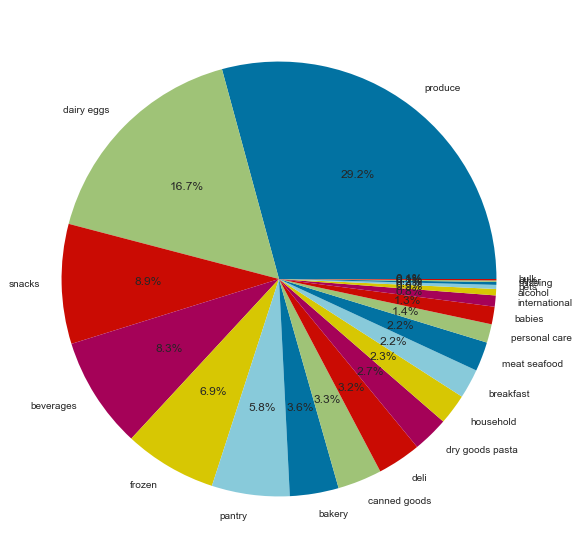

In [52]:
p_df=pd.merge(products,departments,on='department_id')
p_df=pd.merge(p_df,aisles, on ='aisle_id')
o_df=pd.merge(p_df,order_products_prior,on = 'product_id')
plt.figure(figsize=(20,10))
result = o_df['department'].value_counts(normalize=True)
plt.pie(result,labels=result.index, autopct='%1.1f%%')

---
---

# Correlation
<a href="#Instartcart-Market-Analysis">Back to top</a><ul></ul>

### Correlation of orders

In [51]:
orders.head()
order_products = order_products_prior.append(order_products_train)
order_size = order_products.groupby('order_id').size().to_frame('order_size')
new_orders = pd.merge(orders, order_size, on='order_id')
new_orders.head()
new_orders.drop(columns=['order_id','user_id'],inplace=True)
# import numpy as np
# f, ax = plt.subplots(figsize=(10, 8))
corr = new_orders.corr()
# #sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
# #            square=True, ax=ax)
corr.style.background_gradient(cmap='coolwarm')



,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_size
order_number,1.000000,0.015157,-0.035910,-0.360495,-0.002118
order_dow,0.015157,1.000000,0.006082,-0.028409,-0.025404
order_hour_of_day,-0.035910,0.006082,1.000000,0.000863,-0.005596
days_since_prior_order,-0.360495,-0.028409,0.000863,1.000000,0.057544
order_size,-0.002118,-0.025404,-0.005596,0.057544,1.000000


In [54]:
#import numpy as np
#f, ax = plt.subplots(figsize=(10, 8))
#corr = o_df.corr()
#sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
#             square=True, ax=ax)
#corr.style.background_gradient(cmap='coolwarm')

---
---

# Association rule
<a href="#Instartcart-Market-Analysis">Back to top</a><ul></ul>


This machine learning is to find products relations. Using association rule, we can find relationshop of products customers are buying. For example, if customer buys product A, what chances that product B will be bought by same customer. 


In [4]:
#!pip install apyori


## Restructure the dataset

For each order ID, there are bags of product IDs. This dataset will be used in association rule.

In [5]:
prior = order_products_prior.groupby(['order_id'])['product_id'].apply(list)
prior.head()


order_id
2    [33120, 28985, 9327, 45918, 30035, 17794, 4014...
3    [33754, 24838, 17704, 21903, 17668, 46667, 174...
4    [46842, 26434, 39758, 27761, 10054, 21351, 225...
5    [13176, 15005, 47329, 27966, 23909, 48370, 132...
6                                [40462, 15873, 41897]
Name: product_id, dtype: object

## Apriori association
* Minimum length is 2
* Minimum support is 0.01
* Minimum confidence is 0.1
* Minimum lift is 2

Total 7 items are returned

In [6]:
%%time
from apyori import apriori
associations = apriori(prior, min_length = 2, min_support = 0.01, min_confidence = 0.1, min_lift = 2)
associations = list(associations)


CPU times: user 41.5 s, sys: 1 s, total: 42.5 s
Wall time: 44.5 s


In [7]:
print(len(associations))

7


## Interpretation of association result

Banana has strong relation to other fruites: raspberries, avocado

In [8]:
def product_name(id):
    return products[products['product_id']==id]['product_name'].values

for item in associations:
    
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + str(product_name(items[0]) + " -> " + str(product_name(items[1]))))
    print("support " + str(item[1]))
    print("confidence: " + str(item[2][0][2]))
    print("lift: " + str(item[2][0][3]))
    print('')



Rule: ["Bag of Organic Bananas -> ['Organic Raspberries']"]
support 0.012598627504530504
confidence: 0.10674133614441955
lift: 2.5037754094716407

Rule: ["Bag of Organic Bananas -> ['Organic Hass Avocado']"]
support 0.019391428715402222
confidence: 0.164293055738569
lift: 2.4729449456629538

Rule: ["Organic Strawberries -> ['Organic Raspberries']"]
support 0.01053322774080726
confidence: 0.12793794841376288
lift: 3.0009732007029744

Rule: ["Organic Strawberries -> ['Organic Hass Avocado']"]
support 0.012689144271284038
confidence: 0.15412398982934303
lift: 2.3198798022259126

Rule: ["Organic Hass Avocado -> ['Organic Baby Spinach']"]
support 0.010856101980979659
confidence: 0.14426610339739007
lift: 2.171498543400166

Rule: ["Banana -> ['Organic Fuji Apple']"]
support 0.01055811207530995
confidence: 0.37869287754373443
lift: 2.576259109330009

Rule: ["Banana -> ['Organic Avocado']"]
support 0.016608738009638947
confidence: 0.11298974744215082
lift: 2.054394713787502



---
---

# Customer segmentation
<a href="#Instartcart-Market-Analysis">Back to top</a><ul></ul>


Customer segmentation is processed using K mean clustering. Features that are used in here are 
* Total number of orders
* Average of days since order
* Average size of orders per customer
* Total reordered



In [ ]:
#!pip install yellowbrick

In [7]:
# columns user_id, total number of orders, average of days_since_prior_order, avarage size of orders per customer

c = order_products_prior.groupby('order_id')['product_id'].count()
r = order_products_prior.groupby('order_id')['reordered'].sum()
df = pd.concat([c, r], axis=1)
df = df.reset_index()
cust_orders = pd.merge(orders, df, on='order_id')
cust_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,reordered
0,2539329,1,prior,1,2,8,NaN,5,0
1,2398795,1,prior,2,3,7,15.0,6,3
2,473747,1,prior,3,3,12,21.0,5,3
3,2254736,1,prior,4,4,7,29.0,5,5
4,431534,1,prior,5,4,15,28.0,8,5


## Cleaning of customer dataset

In [8]:
# cust_orders.days_since_prior_order.dropna(axis=0, how='any',inplace=True)
cust_orders.dropna(inplace=True)
cust_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,reordered
1,2398795,1,prior,2,3,7,15.0,6,3
2,473747,1,prior,3,3,12,21.0,5,3
3,2254736,1,prior,4,4,7,29.0,5,5
4,431534,1,prior,5,4,15,28.0,8,5
5,3367565,1,prior,6,2,7,19.0,4,4


In [9]:
cust_orders = cust_orders[cust_orders.eval_set != 'train']
cust_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,reordered
1,2398795,1,prior,2,3,7,15.0,6,3
2,473747,1,prior,3,3,12,21.0,5,3
3,2254736,1,prior,4,4,7,29.0,5,5
4,431534,1,prior,5,4,15,28.0,8,5
5,3367565,1,prior,6,2,7,19.0,4,4


## Construct the dataset
Constructing 4 columns of dataset

In [10]:
# total number of orders
c = cust_orders.groupby('user_id')['product_id'].count() 
# average of days since the order
d = cust_orders.groupby('user_id')['days_since_prior_order'].mean() 
# avarage size of orders per customer
a = cust_orders.groupby('user_id')['product_id'].mean()
# total reordered items per customer
r = cust_orders.groupby('user_id')['reordered'].sum()

df = pd.concat([c,d,a,r],axis=1)
df = df.reset_index()
# new_c = pd.merge(c, d, on='user_id', copy=True)
# new_c = pd.merge(new_c, a, on='user_id', copy=True)
# new_c = pd.merge(new_c, r, on='user_id', copy=True)
df.columns = ['user_id','total_orders','average_days_since_order'
                 ,'average_size_of_orders','total_reordered']
df.head()

,user_id,total_orders,average_days_since_order,average_size_of_orders,total_reordered
0,1,9,19.555556,6.000000,41
1,2,13,15.230769,14.000000,93
2,3,11,12.090909,7.090909,55
3,4,4,13.750000,3.500000,1
4,5,3,13.333333,8.666667,14


## Elbow method
Using elbow method, finding the cluster size.
In this case, the cluster size would be 4.

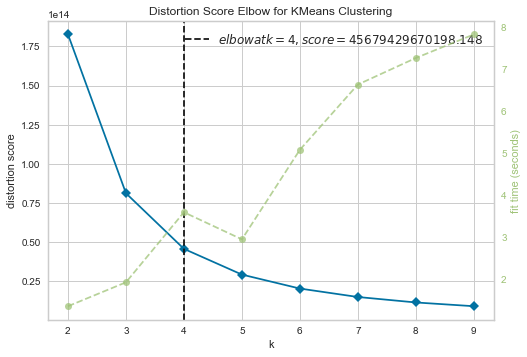

/Users/donkim/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1a28c23850>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=True)

In [13]:
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.datasets.loaders import load_nfl

kelbow_visualizer(KMeans(random_state=1), df, k=(2,10))

## K Mean
Generated 4 clusters. However, all of 4 clusters are very similar. Possibly, variables are needed to be changed

In [14]:
import sklearn
from sklearn.cluster import KMeans

# df = scaler.transform(df)
clustering = KMeans(n_clusters=4, random_state = 1)
model = clustering.fit(df)
df_new = df.assign(Cluster = model.labels_)

print(model.cluster_centers_)
# df
result = df_new.groupby('Cluster').mean()
result.head()




[[7.66995000e+04 1.46748028e+01 1.52076714e+01 9.97984487e+00
  9.32777994e+01]
 [1.80246500e+05 1.45069522e+01 1.52512931e+01 9.95768467e+00
  9.22452143e+01]
 [2.54855000e+04 1.46382578e+01 1.51764485e+01 9.95966646e+00
  9.32166961e+01]
 [1.28356000e+05 1.45430335e+01 1.52016950e+01 9.91514554e+00
  9.22855462e+01]]


,user_id,total_orders,average_days_since_order,average_size_of_orders,total_reordered
Cluster,,,,,
0,76810.0,14.678526,15.206966,9.981499,93.340585
1,180255.5,14.506993,15.251545,9.958034,92.252408
2,25546.5,14.633915,15.176671,9.959635,93.181163
3,128414.5,14.543400,15.202003,9.913121,92.249256


---
---

# Decision tree
<a href="#Instartcart-Market-Analysis">Back to top</a><ul></ul>

## Combine all the dataset
Independent variable is reordered column

In [41]:
new_order_prior=pd.merge(products,order_products_prior,  on='product_id')
new_order_prior=pd.merge(orders,new_order_prior,  on='order_id')
new_order_prior=pd.merge(aisles,new_order_prior,  on='aisle_id')
new_order_prior=pd.merge(departments,new_order_prior,  on='department_id')
new_order_prior.head()

,department_id,department,aisle_id,aisle,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,product_name,add_to_cart_order,reordered
0,1,frozen,34,frozen meat seafood,2505309,14,prior,7,5,10,30.0,831,All Natural Premium Cornish Hen,4,0
1,1,frozen,34,frozen meat seafood,3067644,14,prior,8,4,8,27.0,13159,Beer Battered Fish Fillets,10,0
2,1,frozen,34,frozen meat seafood,3394109,14,prior,13,5,5,7.0,38845,PubHouse Battered Cod,11,0
3,1,frozen,34,frozen meat seafood,1321974,19,prior,1,6,13,NaN,35123,Grilled & Ready Chicken Breast Strips,21,0
4,1,frozen,34,frozen meat seafood,2293453,19,prior,2,5,14,6.0,35123,Grilled & Ready Chicken Breast Strips,4,1


## Data cleaning of order dataset

In [43]:
new_order_prior.dropna(inplace=True)
new_order_prior = new_order_prior[new_order_prior.eval_set != 'train']
new_order_prior.head()

,department_id,department,aisle_id,aisle,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,product_name,add_to_cart_order,reordered
0,1,frozen,34,frozen meat seafood,2505309,14,prior,7,5,10,30.0,831,All Natural Premium Cornish Hen,4,0
1,1,frozen,34,frozen meat seafood,3067644,14,prior,8,4,8,27.0,13159,Beer Battered Fish Fillets,10,0
2,1,frozen,34,frozen meat seafood,3394109,14,prior,13,5,5,7.0,38845,PubHouse Battered Cod,11,0
4,1,frozen,34,frozen meat seafood,2293453,19,prior,2,5,14,6.0,35123,Grilled & Ready Chicken Breast Strips,4,1
5,1,frozen,34,frozen meat seafood,2208892,19,prior,3,0,14,16.0,35123,Grilled & Ready Chicken Breast Strips,3,1


# Feature selection

Removed all the categorical columns since sklearn cannot handle strings. Order_id is removed because it is not relevant.

In [44]:
# new_order_prior.drop(['order_id',
#                       'user_id',
#                       'eval_set',
#                       'product_id',
#                       'aisle_id',
#                       'department_id'], axis=1, inplace = True)
new_order_prior.drop(['department',
                      'aisle',
                      'user_id',
                      'eval_set',
                      'product_name'], axis=1, inplace = True)
new_order_prior.head()


,department_id,aisle_id,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,1,34,2505309,7,5,10,30.0,831,4,0
1,1,34,3067644,8,4,8,27.0,13159,10,0
2,1,34,3394109,13,5,5,7.0,38845,11,0
4,1,34,2293453,2,5,14,6.0,35123,4,1
5,1,34,2208892,3,0,14,16.0,35123,3,1


## Decision tree prediction

25% split and predicted the output

In [45]:
X = new_order_prior.iloc[:, :-1].values
y = new_order_prior.iloc[:, -1].values

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [47]:
%%time
## takes more than 15 mins
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

#predict
y_pred = classifier.predict(X_test)

## Decision tree confusing matrix and accuracy

Accuracy is 63% which is below 80%. It needs an improvement.


In [48]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1445577 1361096]
 [1406149 3376284]]


0.6353661419408294